# Animation

Sometimes, a static graph doesn't quite illustrate your calculation quite as well as an animation would. A good animation can actually help you understand better what is actually happening with the physics. 

There are two systems for animation that are quite within reach. If you want cinematic realism, you would need to put in the time to learn all the special details needed, but that is possible with, for instance, [Blender](https://www.blender.org)

## Animating Plots
First, we look at animating a plot using matplotlib. An example of this can be found also in the [Double Pendulum](https://github.com/mholtrop/Phys601/blob/master/Notebooks/A02_Double_Pendulum.ipynb) notebook. An alternate system for plotting which also has animations is [Plotly](https://plot.ly) see [Plotly animations](https://plot.ly/python/#animations)

Function animations are useful when you want to show how the function depends on one additional variable, which we change in time to get the animation. The basics of all animations is successively drawing frames, with each frame slightly changed. For animating functions, we can use [matplotlib.animation](https://matplotlib.org/api/animation_api.html). We would want two functions, one for the initialization, where we draw the parts that do not change, and one for the animation itself, where we draw the things that do change. The key is to only draw the those parts that change, so that the time to do the drawing is minimized.

Here is a really simple animation of a sine wave, where we change the phase for each step in time. A moving wave has the equation:
$$
y(t) = A sin( k x - \omega t)
$$
We will start with $k$=1, and $\omega=0.1$.  

First, we plot the curve for a few choices of $t$, to get a sense of what would happen:

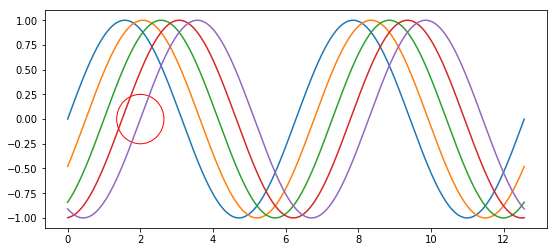

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

import matplotlib.patches as pt

x = np.linspace(0.,4*np.pi,1000)

fig1 = plt.figure(figsize=(9,4))
ax = fig1.add_subplot(1,1,1)
for t in np.linspace(0,20,5):
    y = np.sin(x - 0.1*t)
    plt.plot(x,y)

You can imagine that this is a wave moving to the right. Now we want the wave to move. We create an `init()` function, that doesn't do much except for setting up the line, and an `animate(i)` function that draws the line for the i-th frame. We need to start the plot with an empty line, and keep a handle for this line so we can change it.

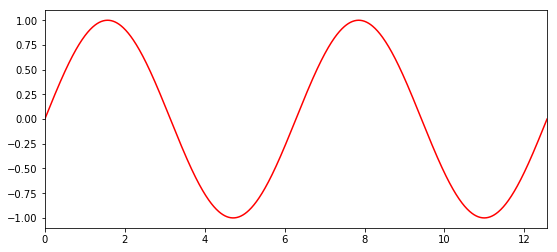

In [2]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from IPython.display import HTML

# These two lines tell matplotlib that we want our animation displayed
# with the html5 video method. If you do not do this, then the animation
# will not display in a notebook.
from matplotlib import rc
rc('animation', html='html5')

x = np.linspace(0.,4*np.pi,1000)
omega = 1.
num_frames=100
speed=20.   # Speed of the animation in frames/sec. 
fig2 = plt.figure(figsize=(9,4))

#
# Setup the plotting limits.
plt.xlim(0,4*np.pi)
plt.ylim(-1.1,1.1)
# Here we setup the axes of the plot. We can set limits 
line, = plt.plot([],[],color="red")  # This is the empty plot line, in red.

# initialization function: plot the background of each frame
def init():
    line.set_data([],[])
    return(line,)

# This is the animation routine. It paints the frame for time t.
def animate(t):
    y = np.sin(x - omega*t)
    line.set_data(x,y)
    return(line,)

# We set a time array that is just long enough to have one complete wave cycle
# go by. We break it up into num_frame steps.
time = np.linspace(0.,2*np.pi/omega,num_frames) 
#
# The next line computes the animation.
wave_ani = animation.FuncAnimation(fig2,animate,time,blit=True,interval=1000/speed,init_func=init)
# This line, takes the animation and outputs it. Since we asked for HTML5, we get an HTML5 video in our
# browser screen.
wave_ani  

I have not yet found a way to get rid of the extra static frame that it draws. It comes from the `%matplotlib inline` initialization, however, if you leave that out you will sometimes get different effects, such as a popup box with the graph. For now, we will just put up with the extra static frame.

Next, we add a dot on our wave at the point x=1, which follows the up and down of the wave, and another dot that follow along the top of the wave crest. Note that this second wave shows how we reset our animation when half way. Can you change the code so that the dot travels all the way to the right, and then re-appears at the left?

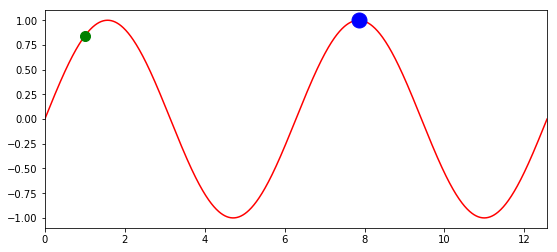

In [20]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from IPython.display import HTML

# These two lines tell matplotlib that we want our animation displayed
# with the html5 video method. If you do not do this, then the animation
# will not display in a notebook.
from matplotlib import rc
rc('animation', html='html5')

x = np.linspace(0.,4*np.pi,1000)
omega = 1.
num_frames=100
speed=20.   # Speed of the animation in frames/sec. 
fig2 = plt.figure(figsize=(9,4))

#
# Setup the plotting limits.
plt.xlim(0,4*np.pi)
plt.ylim(-1.1,1.1)
# Here we setup the axes of the plot. We can set limits 
line, = plt.plot([],[],color="red")  # This is the empty plot line, in red.
dot1, =  plt.plot([],[],'o',color="green",markersize=10)
dot2, =  plt.plot([],[],'o',color="blue",markersize=15)

# initialization function: plot the background of each frame
def init():
    line.set_data([],[])
    dot1.set_data([],[])
    dot1.set_data([],[])
    return(line,dot1,dot2,)

# This is the animation routine. It paints the frame for time t.
def animate(t):
    y = np.sin(x - omega*t)
    ydot= np.sin(1 - omega*t)
    line.set_data(x,y)
    dot1.set_data([1],ydot)
    dot2.set_data([0.5*np.pi+omega*t],[1.])
    return(line,dot,)

# We set a time array that is just long enough to have one complete wave cycle
# go by. We break it up into num_frame steps.
time = np.linspace(0.,2*np.pi/omega,num_frames) 
#
# The next line computes the animation.
wave_ani = animation.FuncAnimation(fig2,animate,time,blit=True,interval=1000/speed,init_func=init)
# This line, takes the animation and outputs it. Since we asked for HTML5, we get an HTML5 video in our
# browser screen.
wave_ani  

# 3D Animations of balls and blocks

To make 3D animations you clearly need something a lot more complicated. You can do this, to some extend with a package called "vpython". If it is not installed already with your system, you can add it at the command prompt with:

  `pip install vpython`
  
Once it is installed, you can add vpython to your notebooks. If you run it from inside ipython (or python), it will open a web page in your browser for the display. What vpython does under the hood is create javascript code to do the actual animation.

